In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [8]:
df = pd.read_csv("./metricas.csv")

In [9]:
df

,Funcion,Repetitividad,Disticion de Pares,Clase
0,0,64,0.000000,small
1,1,56,0.000000,small
2,2,56,0.000000,small
3,3,56,0.000000,small
4,4,56,0.000000,small
...,...,...,...,...
4100663,1456381527,24,723.416667,big
4100664,3194513099,28,837.916667,big
4100665,1127630112,32,585.166667,big
4100666,4245509472,44,367.416667,big


In [10]:
X = df.loc[:,['Repetitividad', 'Disticion de Pares']]
Y = df.loc[:,['Clase']]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
print(np.sum(y_train == 'small')/len(y_train)*100)
print(np.sum(y_test == 'small')/len(y_test)*100)

Clase    50.012102
dtype: float64
Clase    49.975429
dtype: float64


In [15]:
len(X_test)

1353221

In [19]:
clf = LogisticRegression(random_state=333).fit(X_train, y_train)

C:\Users\jorvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [20]:
y_test_pred = clf.predict(X_test)

In [21]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         big       0.91      0.91      0.91    676943
       small       0.91      0.91      0.91    676278

    accuracy                           0.91   1353221
   macro avg       0.91      0.91      0.91   1353221
weighted avg       0.91      0.91      0.91   1353221



Confusion not normalized
[[618860  58083]
 [ 57783 618495]]
Confusion matrix normalized
[[0.91419809 0.08580191]
 [0.08544267 0.91455733]]


<AxesSubplot:title={'center':'Heuristic classifier'}, xlabel='Predicted label', ylabel='Correct label'>

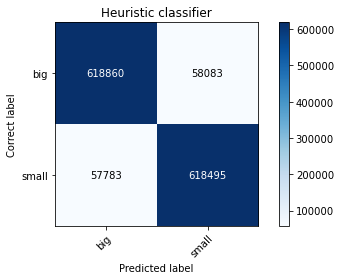

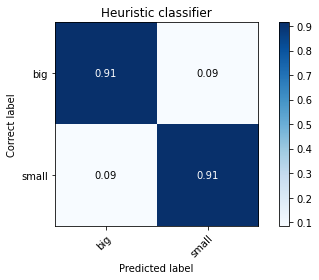

In [27]:
plot_confusion_matrix(y_test, y_test_pred, normalize = False, title = 'Heuristic classifier')
plot_confusion_matrix(y_test, y_test_pred, normalize = True, title = 'Heuristic classifier')

In [ ]:
print(clf.coef_)

[[-0.0157047   2.64635338 -1.87987816]]
